Grop Project/ADS500B / Hoori Javadnia

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. 
Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 
The dataset is ordered by date (from May 2008 to November 2010).

1.Data Importing and Pre-processing

    Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used
    Clean, wrangle, and handle missing data
    Transform data appropriately using techniques such as aggregation, normalization, and feature construction
    Reduce redundant data and perform need based discretization


In [2]:
#At the begining we need to import all the packages we want use.
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [26]:
%pwd


'C:\\Users\\javad\\Desktop\\ADS500B\\Group Project'

In [27]:
bank_data = pd.read_csv('bank_marketing.csv',sep=';')


In [28]:
bank_data.shape

(45211, 17)

In [29]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,NaN,5,may,198,1,-1,0,unknown,no


In [30]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,43872.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.924781,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.610835,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# data cleaning

In [208]:
# let us see how many Null values are there
null_percentage = (bank_data.isnull().sum())/bank_data.shape[0]*100
null_percentage


age          2.961669
job          0.000000
marital      0.000000
education    0.000000
default      2.888678
balance      0.000000
housing      0.000000
loan         0.000000
contact      3.058990
day          0.000000
month        0.000000
duration     0.000000
campaign     0.000000
pdays        0.000000
previous     0.000000
poutcome     0.000000
deposit      0.000000
dtype: float64

In [210]:
bank_data.skew(axis = 0, skipna = True)
# Acceptable values of skewness fall between − 3 and + 3

age          0.685238
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

In [211]:

age_mean = bank_data['age'].mean()
bank_data['age'] = bank_data['age'].fillna(age_mean)

bank_data['age'].isnull().sum()
bank_data.isnull().sum()







age             0
job             0
marital         0
education       0
default      1306
balance         0
housing         0
loan            0
contact      1383
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
deposit         0
dtype: int64

In [212]:

default_mode = bank_data['default'].mode()
bank_data['default'] = bank_data['default'].fillna(str(default_mode))

bank_data['default'].isnull().sum()
bank_data.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact      1383
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
deposit         0
dtype: int64

In [213]:
contact_mode = bank_data['contact'].mode()
bank_data['contact'] = bank_data['contact'].fillna(str(contact_mode))

bank_data.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [214]:
#bank_data['age'].astype('int32')

In [215]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  deposit    45211 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 4.1+ MB


In [216]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.924781,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.452521,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<AxesSubplot:xlabel='balance'>

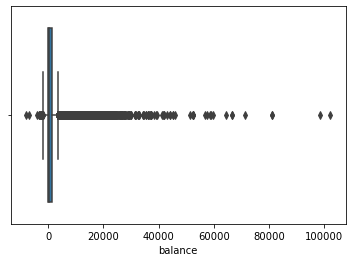

In [217]:
sns.boxplot(x = bank_data['balance'])

In [218]:
bank_data.median()

age          39.0
balance     448.0
day          16.0
duration    180.0
campaign      2.0
pdays        -1.0
previous      0.0
dtype: float64

In [10]:
print(type(bank_data))

<class 'pandas.core.frame.DataFrame'>


In [11]:
bank_data.shape

(45211, 17)

In [221]:
bank_data.size

768587

In [222]:
bank_data.count()

age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
deposit      45211
dtype: int64

In [224]:
round(bank_data.describe(),2)

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.92,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.45,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


In [158]:
bank_data['age'].describe()

count    45211.000000
mean        40.924781
std         10.452521
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

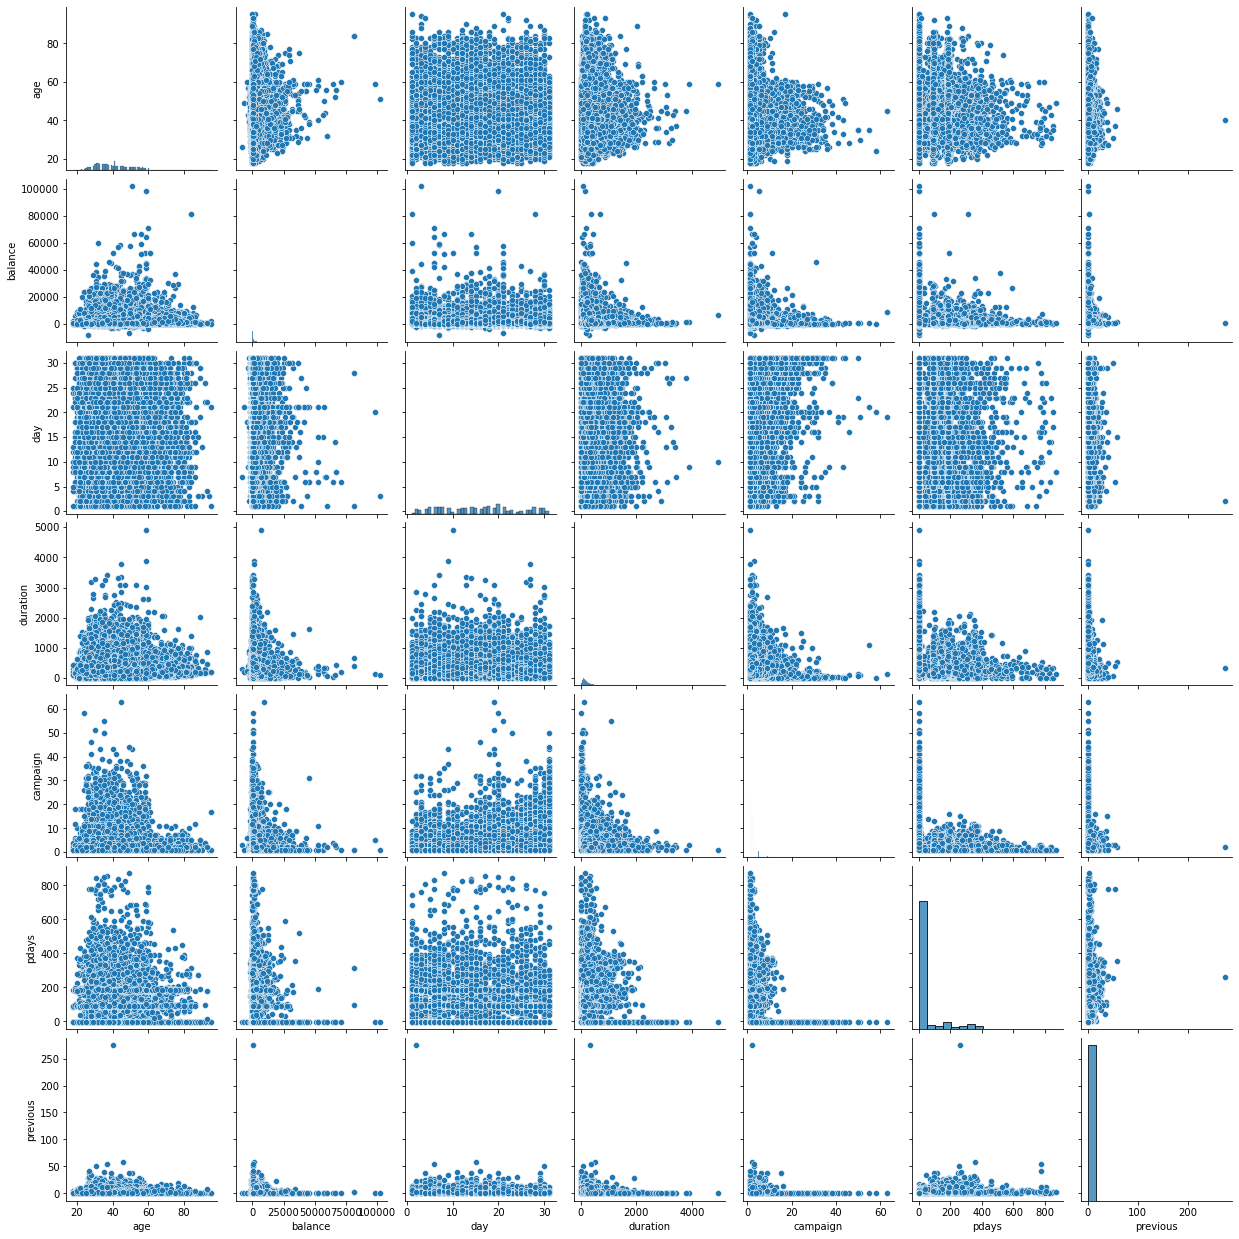

In [124]:
sns.pairplot(bank_data)

<AxesSubplot:xlabel='previous'>

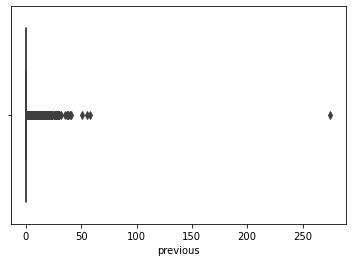

In [193]:
sns.boxplot(x = bank_data['previous'])

In [225]:
bank_data['previous'].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41], dtype=int64)

<AxesSubplot:xlabel='previous', ylabel='Count'>

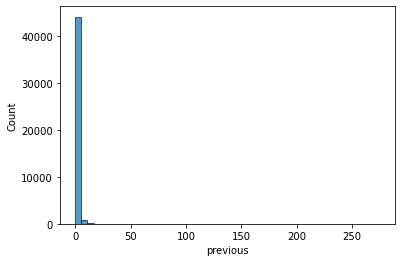

In [229]:
sns.histplot(bank_data['previous'],bins = 50)

<AxesSubplot:xlabel='age'>

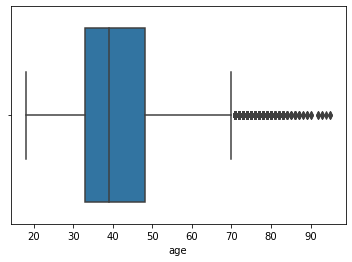

In [162]:
sns.boxplot(x = bank_data['age'])

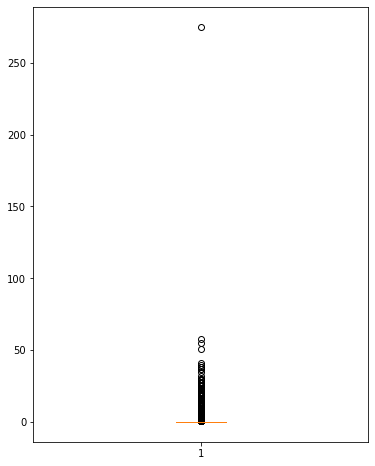

In [164]:
fig = plt.figure(figsize = (6,8))
plt.boxplot(bank_data['previous'])
plt.show()

In [197]:
bank_data.shape

(45211, 17)

<AxesSubplot:xlabel='previous', ylabel='Count'>

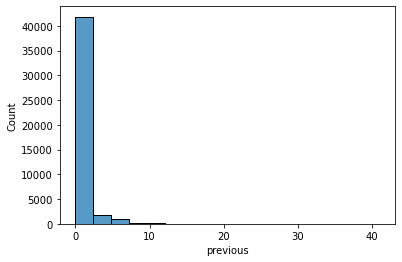

In [202]:
sns.histplot(x=bank_data['previous'],data = bank_data)

In [200]:
Q3p = bank_data['previous'].quantile(0.75)
Q1p = bank_data['previous'].quantile(0.25)
IQRp = Q3p - Q1p
print(Q3p)
print(Q1p)
print(IQRp)
bank_data = bank_data[bank_data['previous']< 50]

0.0
0.0
0.0


In [230]:
bank_data.shape

(45211, 17)

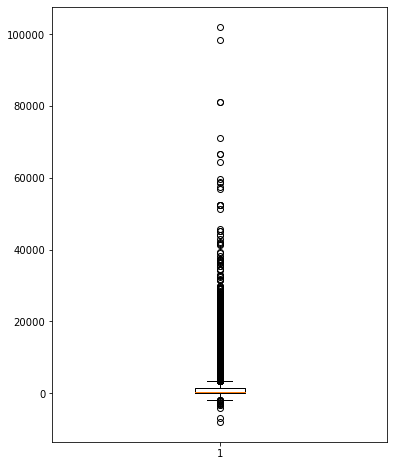

In [231]:
#Balance 

fig = plt.figure(figsize = (6,8))
plt.boxplot(bank_data['balance'])
plt.show()

In [232]:
Q3b = bank_data['balance'].quantile(0.75)
Q1b = bank_data['balance'].quantile(0.25)
IQRb = Q3b - Q1b
print(Q3b)
print(Q1b)
print(IQRb)
bank_data = bank_data[bank_data['balance'] < (1.5*IQRb + Q3b)]

1428.0
72.0
1356.0


In [233]:
bank_data.shape

(40497, 17)

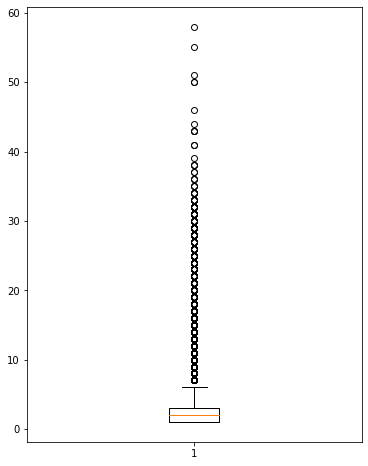

In [234]:
fig = plt.figure(figsize = (6,8))
plt.boxplot(bank_data['campaign'])
plt.show()

In [235]:
Q3c = bank_data['campaign'].quantile(0.75)
Q1c = bank_data['campaign'].quantile(0.25)
IQRc = Q3c - Q1c
print(Q3c)
print(Q1c)
print(IQRc)
bank_data = bank_data[bank_data['campaign'] < (1.5*IQRc + Q3c)]

3.0
1.0
2.0


In [236]:
bank_data.shape

(36583, 17)

In [246]:
bank_data.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.093884,-0.011327,-0.008927,0.026566,-0.020336,0.001783
balance,0.093884,1.000000,0.006795,0.035455,-0.024036,0.029391,0.036059
day,-0.011327,0.006795,1.000000,-0.019970,0.090520,-0.079763,-0.041207
duration,-0.008927,0.035455,-0.019970,1.000000,-0.013579,-0.006509,0.004027
campaign,0.026566,-0.024036,0.090520,-0.013579,1.000000,-0.065489,-0.012436
pdays,-0.020336,0.029391,-0.079763,-0.006509,-0.065489,1.000000,0.440580
previous,0.001783,0.036059,-0.041207,0.004027,-0.012436,0.440580,1.000000


<AxesSubplot:>

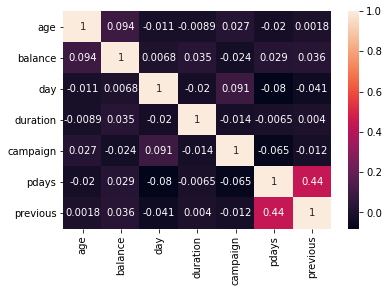

In [248]:
sns.heatmap(bank_data.corr(),annot=True)

In [263]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = bank_data[['age','balance','day','duration','campaign','pdays','previous']]
#scaler.fit_transform(X)

#Data Analysis and Visualization

Identify categorical, ordinal, and numerical variables within data
Provide measures of centrality and distribution with visualizations
Diagnose for correlations between variables and determine independent and dependent variables
Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest

In [12]:
bank_data.dtypes

age          float64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
deposit       object
dtype: object

In [13]:
import matplotlib.pyplot as plt
import networkx as nx
  
G = nx.()
  
plt.figure(figsize =(15, 15))
nx.draw_networkx(g, with_labels = True)

AttributeError: module 'networkx' has no attribute 'bank_data'

<AxesSubplot:xlabel='age', ylabel='Count'>

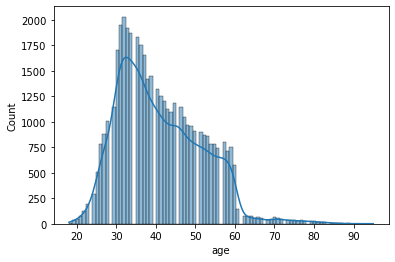

In [16]:
sns.histplot(bank_data['age'],kde= True)

C:\Users\javad\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

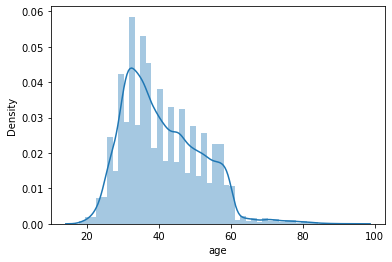

In [17]:
sns.distplot(bank_data['age'])

In [21]:
pip install scikit-learn

  Using cached scikit-learn-1.0.1.tar.gz (6.6 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'
  Using cached scikit-learn-1.0.tar.gz (7.8 MB)
  Installing build dependencies: started
Note: you may need to restart the kernel to use updated packages.
  Installing build dependencies: finished with status 'done'

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\javad\AppData\Local\Programs\Python\Python310\python.exe' 'C:\Users\javad\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' prepare_metadata_for_build_wheel 'C:\Users\javad\AppData\Local\Temp\tmpftkmomfu'
       cwd: C:\Users\javad\AppData\Local\Temp\pip-install-2ur1tdmj\scikit-learn_399aa23c2ffc481bb26f13e5ff2db33e
  Complete output (46 lines):
  Partial import of sklearn during the build process.
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  Traceback (most recent call last):
    File "C:\Users\javad\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py", line 363, in <module>
      main()
    File "C:\Users\javad\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py", line 345, in main
      json_out['return_val'] = 


  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'
  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'
  Using cached scikit-learn-0.24.1.tar.gz (7.4 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using


    File "C:\Users\javad\AppData\Local\Programs\Python\Python310\lib\distutils\_msvccompiler.py", line 323, in compile
      self.initialize()
    File "C:\Users\javad\AppData\Local\Programs\Python\Python310\lib\distutils\_msvccompiler.py", line 220, in initialize
      vc_env = _get_vc_env(plat_spec)
    File "C:\Users\javad\AppData\Local\Temp\pip-build-env-maqy5q94\overlay\Lib\site-packages\setuptools\msvc.py", line 316, in msvc14_get_vc_env
      return _msvc14_get_vc_env(plat_spec)
    File "C:\Users\javad\AppData\Local\Temp\pip-build-env-maqy5q94\overlay\Lib\site-packages\setuptools\msvc.py", line 270, in _msvc14_get_vc_env
      raise distutils.errors.DistutilsPlatformError(
  distutils.errors.DistutilsPlatformError: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  ----------------------------------------
  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\ja


  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
Failed to build scikit-learn


  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  Traceback (most recent call last):
    File "C:\Users\javad\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py", line 363, in <module>
      main()
    File "C:\Users\javad\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py", line 345, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
    File "C:\Users\javad\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py", line 261, in build_wheel
      return _build_backend().build_wheel(wheel_directory, config_settings,
    File "C:\Users\javad\AppData\Local\Temp\pip-build-env-buwvj3r7\overlay\Lib\site-packages\setuptools\build_meta.py", line 230, in build_wheel
      return self._build_with_temp_dir(['bdist_wheel'], '.whl',
    File "C:\Users\javad\AppData\Local\Temp\pip-build-env-